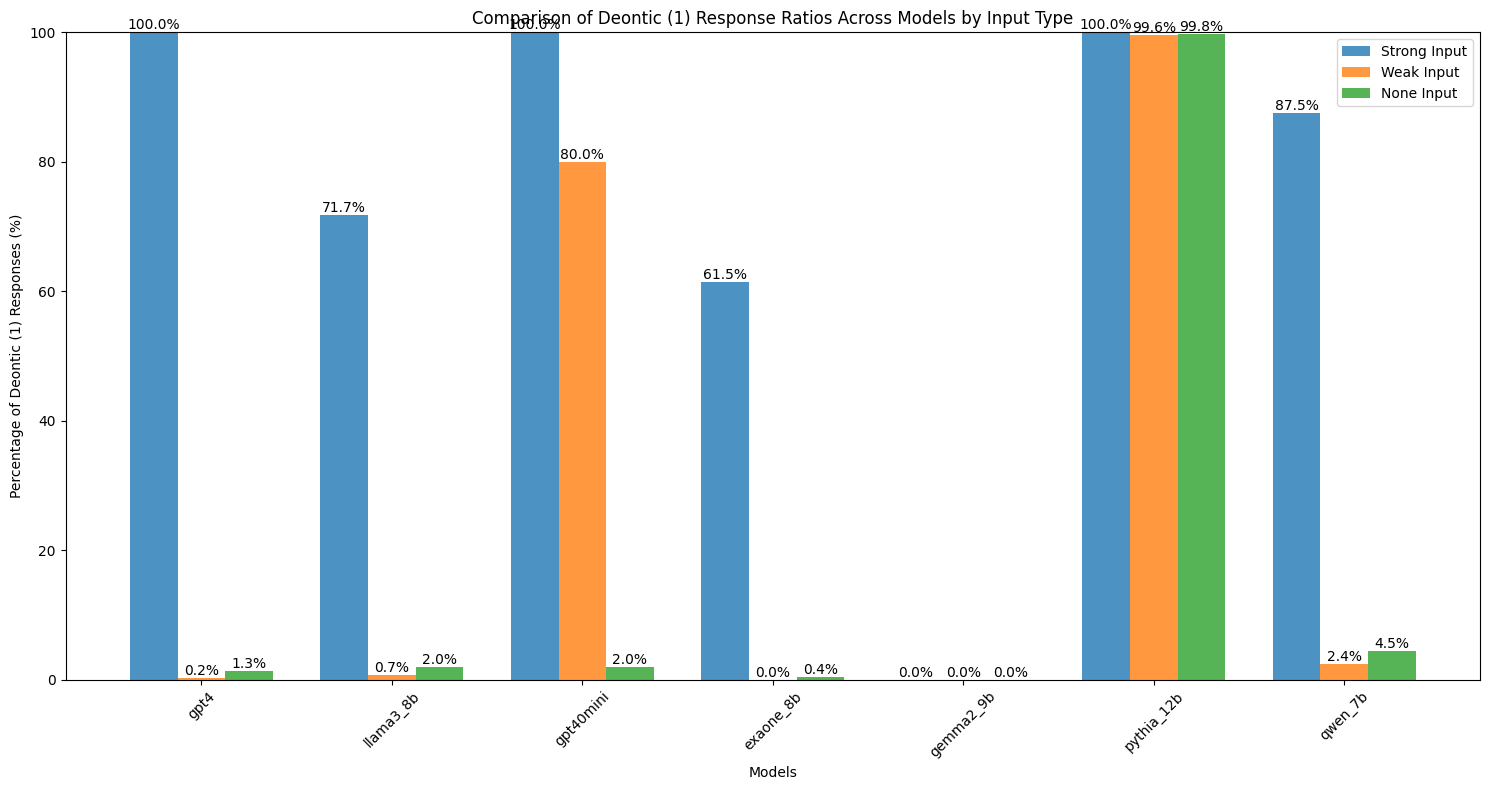

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np
import seaborn as sns 
def parse_summary_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        content = f.read()
    data = []
    # 수정된 정규표현식 패턴
    patterns = {
        'total': r'전체 문장 수: (\d+)',
        'one': r'1(?:\.0?)? 개수: (\d+)',  # 1, 1.0, 1.00 등의 패턴
        'zero': r'0(?:\.0?)? 개수: (\d+)',  # 0, 0.0, 0.00 등의 패턴
        'none': r'None 개수: (\d+)'
    }
    # Strong, Weak, None 문장 섹션 찾기
    for input_type in ['Strong', 'Weak', 'None']:
        section_match = re.search(f'{input_type} 문장:\n(.*?)(?=\n\n|\Z)', content, re.DOTALL)
        if section_match:
            section_content = section_match.group(1)
            row = {'input_type': input_type}
            for key, pattern in patterns.items():
                match = re.search(pattern, section_content)
                if match:
                    row[f'{key}_count'] = int(match.group(1))
            data.append(row)
    return pd.DataFrame(data)
# 모델 리스트
models = ['gpt4', 'llama3_8b', 'gpt40mini', 'exaone_8b', 'gemma2_9b', 'pythia_12b', 'qwen_7b']
# 모든 모델의 데이터를 저장할 딕셔너리
all_models_data = {}
# 각 모델의 데이터 로드
for model in models:
    file_path = f'/home/jinsil/Deontic/results/experiment2_1/Binary/dataset2/analysis_summary_{model}.txt'
    try:
        df = parse_summary_file(file_path)
        all_models_data[model] = df
        # print(f"\n=== {model} 데이터 로드 완료 ===")
        # print(df)
    except FileNotFoundError:
        print(f"Warning: {model}의 파일을 찾을 수 없습니다.")
        continue
# 그래프 그리기
plt.figure(figsize=(15, 8))
# 막대 위치 설정
x = np.arange(len(models))
width = 0.25
# 각 input type별로 비율 그리기
for i, input_type in enumerate(['Strong', 'Weak', 'None']):
    ratios = []
    for model in models:
        if model in all_models_data:
            df = all_models_data[model]
            type_data = df[df['input_type'] == input_type]
            if not type_data.empty:
                total = type_data['total_count'].values[0]
                one_count = type_data['one_count'].values[0]
                ratio = (one_count / total) * 100 if total > 0 else 0
                ratios.append(ratio)
            else:
                ratios.append(0)
        else:
            ratios.append(0)
    plt.bar(x + (i-1)*width, ratios, width,
            label=f'{input_type} Input',
            alpha=0.8)
# 그래프 꾸미기
plt.xlabel('Models')
plt.ylabel('Percentage of Deontic (1) Responses (%)')
plt.title('Comparison of Deontic (1) Response Ratios Across Models by Input Type')
plt.xticks(x, models, rotation=45)
plt.legend()
plt.ylim(0, 100)
# 값 레이블 표시
for i, input_type in enumerate(['Strong', 'Weak', 'None']):
    ratios = []
    for model in models:
        if model in all_models_data:
            df = all_models_data[model]
            type_data = df[df['input_type'] == input_type]
            if not type_data.empty:
                total = type_data['total_count'].values[0]
                one_count = type_data['one_count'].values[0]
                ratio = (one_count / total) * 100 if total > 0 else 0
                ratios.append(ratio)
            else:
                ratios.append(0)
        else:
            ratios.append(0)
    for j, v in enumerate(ratios):
        plt.text(j + (i-1)*width, v, f'{v:.1f}%',
                ha='center', va='bottom')
plt.tight_layout()
# 그래프 저장 및 출력
save_path = '/home/jinsil/Deontic/results/experiment2_1/analysis/commonsense_model_comparison_deontic_ratios.png'
# plt.savefig(save_path, bbox_inches='tight', dpi=300)
# print(f"\n그래프가 저장되었습니다: {save_path}")
# plt.show()
# # 결과를 텍스트 파일로도 저장
# result_text = "=== Model Comparison - Deontic (1) Response Ratios ===\n\n"
# for model in models:
#     if model in all_models_data:
#         result_text += f"\n{model}:\n"
#         df = all_models_data[model]
#         for _, row in df.iterrows():
#             total = row['total_count']
#             one_count = row['one_count']
#             ratio = (one_count / total) * 100 if total > 0 else 0
#             result_text += f"{row['input_type']} Input: {one_count}/{total} ({ratio:.1f}%)\n"
# text_path = '/home/jinsil/Deontic/results/experiment2_1/analysis/commonsense_model_comparison_deontic_ratios.txt'
# # with open(text_path, 'w') as f:
# #     f.write(result_text)
# print(f"\n결과가 텍스트 파일로 저장되었습니다: {text_path}")

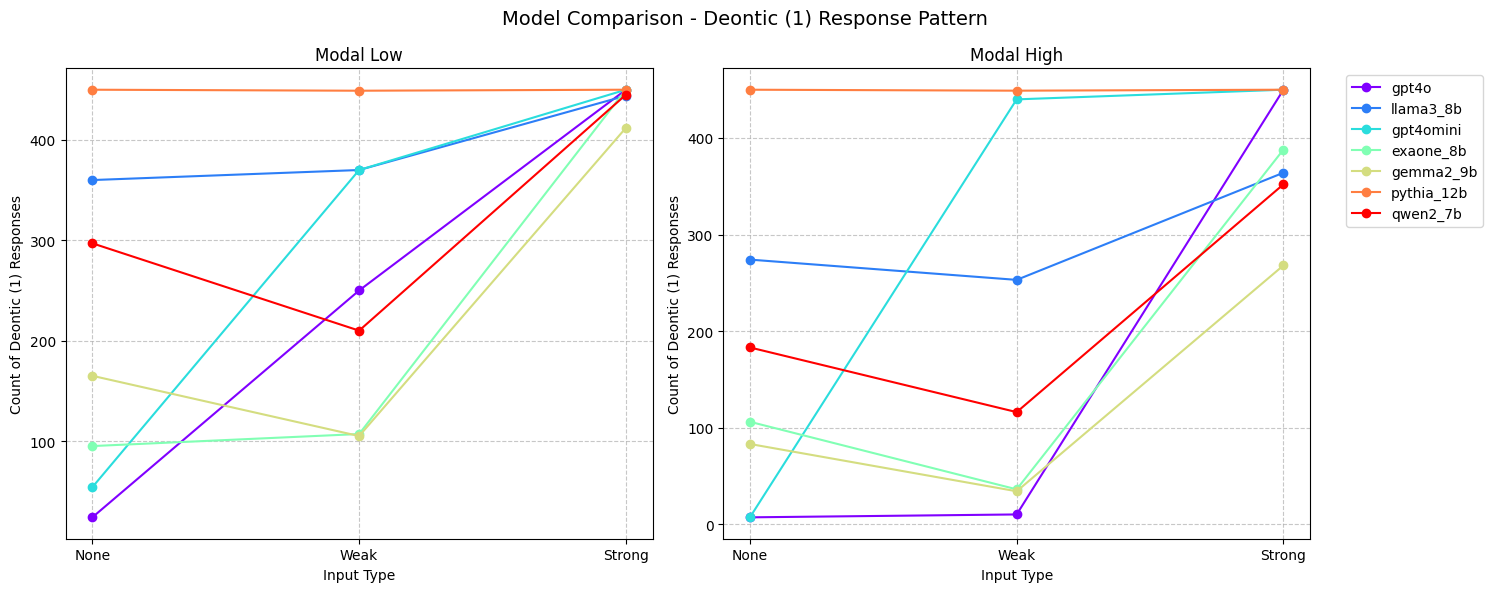

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np
def parse_summary_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        content = f.read()
    data = []
    patterns = {
        'total': r'전체 문장 수: (\d+)',
        'one': r'1(?:\.0?)? 개수: (\d+)',
        'zero': r'0(?:\.0?)? 개수: (\d+)',
        'none': r'None 개수: (\d+)'
    }
    for input_type in ['Strong', 'Weak', 'None']:
        section_match = re.search(f'{input_type} 문장:\n(.*?)(?=\n\n|\Z)', content, re.DOTALL)
        if section_match:
            section_content = section_match.group(1)
            row = {'input_type': input_type}
            for key, pattern in patterns.items():
                match = re.search(pattern, section_content)
                if match:
                    row[f'{key}_count'] = int(match.group(1))
            data.append(row)
    return pd.DataFrame(data)
# 모델 리스트와 색상 설정
models = ['gpt4o', 'llama3_8b', 'gpt4omini', 'exaone_8b', 'gemma2_9b', 'pythia_12b', 'qwen2_7b']
colors = plt.cm.rainbow(np.linspace(0, 1, len(models)))
# 그래프 생성
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('Model Comparison - Deontic (1) Response Pattern', fontsize=14)
# Dataset3 (Modal Low) 및 Dataset4 (Modal High) 처리
for dataset_idx, (dataset, ax, title) in enumerate([
    ('dataset3', ax1, 'Modal Low'),
    ('dataset4', ax2, 'Modal High')
]):
    for model, color in zip(models, colors):
        file_path = f'/home/jinsil/Deontic/results/experiment2_1/Binary/{dataset}/analysis_summary_{model}.txt'
        try:
            df = parse_summary_file(file_path)
            # None, Weak, Strong 순서로 데이터 정렬
            df['input_type'] = pd.Categorical(df['input_type'], categories=['None', 'Weak', 'Strong'], ordered=True)
            df = df.sort_values('input_type')
            # 선 그래프 그리기
            ax.plot(['None', 'Weak', 'Strong'], df['one_count'],
                   marker='o', label=model, color=color)
        except FileNotFoundError:
            print(f"Warning: {file_path}를 찾을 수 없습니다.")
            continue
    # 축 설정
    ax.set_title(title)
    ax.set_xlabel('Input Type')
    ax.set_ylabel('Count of Deontic (1) Responses')
    ax.grid(True, linestyle='--', alpha=0.7)
# 범례 설정 (그래프 오른쪽 바깥에 표시)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
# 레이아웃 조정
plt.tight_layout()
# # 그래프 저장
# save_path = '/home/jinsil/Deontic/results/experiment2_1/analysis/modal_comparison_line_plot.png'
# plt.savefig(save_path, bbox_inches='tight', dpi=300)
# print(f"\n그래프가 저장되었습니다: {save_path}")
# plt.show()
# # 데이터를 텍스트 파일로도 저장
# result_text = "=== Modal Comparison - Deontic (1) Response Counts ===\n\n"
# for dataset in ['dataset3', 'dataset4']:
#     result_text += f"\n=== {dataset} ===\n"
#     for model in models:
#         file_path = f'/home/jinsil/Deontic/results/experiment2_1/Binary/{dataset}/analysis_summary_{model}.txt'
#         try:
#             df = parse_summary_file(file_path)
#             df['input_type'] = pd.Categorical(df['input_type'], categories=['None', 'Weak', 'Strong'], ordered=True)
#             df = df.sort_values('input_type')
#             result_text += f"\n{model}:\n"
#             for _, row in df.iterrows():
#                 result_text += f"{row['input_type']}: {row['one_count']} Deontic responses\n"
#         except FileNotFoundError:
#             continue
# text_path = '/home/jinsil/Deontic/results/experiment2_1/analysis/modal_comparison_counts.txt'
# with open(text_path, 'w') as f:
#     f.write(result_text)
# print(f"\n결과가 텍스트 파일로 저장되었습니다: {text_path}")

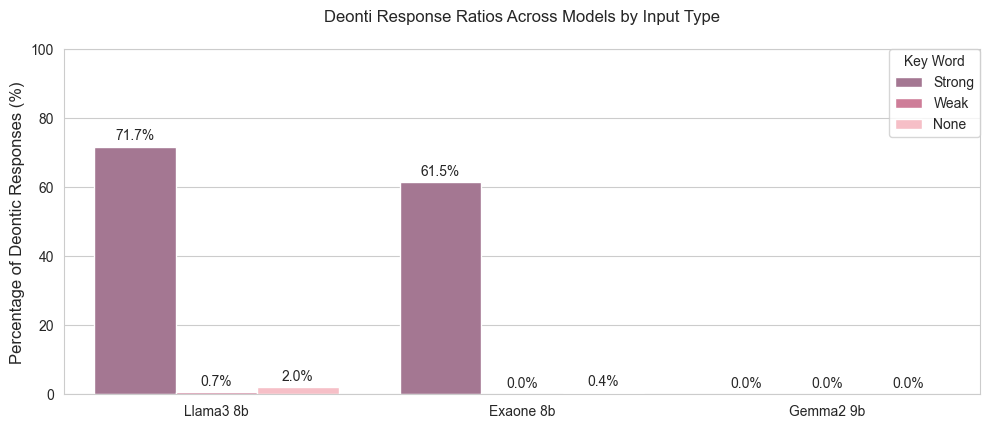

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns
import numpy as np
def parse_summary_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        content = f.read()
    data = []
    patterns = {
        'total': r'전체 문장 수: (\d+)',
        'one': r'1(?:\.0?)? 개수: (\d+)',
        'zero': r'0(?:\.0?)? 개수: (\d+)',
        'none': r'None 개수: (\d+)'
    }
    for input_type in ['Strong', 'Weak', 'None']:
        section_match = re.search(f'{input_type} 문장:\n(.*?)(?=\n\n|\Z)', content, re.DOTALL)
        if section_match:
            section_content = section_match.group(1)
            row = {'input_type': input_type}
            for key, pattern in patterns.items():
                match = re.search(pattern, section_content)
                if match:
                    row[f'{key}_count'] = int(match.group(1))
            data.append(row)
    return pd.DataFrame(data)
# 모델 리스트와 색상 설정
models = ['gpt4o', 'llama3_8b', 'gpt4omini', 'exaone_8b', 'gemma2_9b',  'qwen2_7b']
colors = plt.cm.rainbow(np.linspace(0, 1, len(models)))


# 모든 모델의 데이터를 저장할 딕셔너리
all_models_data = {}

# 각 모델의 데이터 로드
for model in models:
    file_path = f'/home/jinsil/Deontic/results/experiment2_1/Binary/dataset2/analysis_summary_{model}.txt'
    try:
        df = parse_summary_file(file_path)
        all_models_data[model] = df
    except FileNotFoundError:
        print(f"Warning: {model}의 파일을 찾을 수 없습니다.")
        continue

# Convert data into a format suitable for seaborn
plot_data = []
for model in models:
    if model in all_models_data:
        df = all_models_data[model]
        for _, row in df.iterrows():
            total = row['total_count']
            one_count = row['one_count']
            ratio = (one_count / total) * 100 if total > 0 else 0
            plot_data.append({
                'Model': model.replace('_', ' ').capitalize(),
                'Input Type': row['input_type'].strip(),
                'Deontic Response Ratio': ratio
            })

# Convert to DataFrame
plot_df = pd.DataFrame(plot_data)


# Set style and figure size
plt.figure(figsize=(10, 5))
sns.set_style("whitegrid")

# Create grouped bar plot with a different color palette
# You can try different palettes like 'Set2', 'husl', 'Paired', 'Set3', etc.
custom_palette = {
    'Strong': '#AB7093',  # Pale Violet Red
    'Weak': '#DB7093',    # Light Pink
    'None': '#FFB6C1'     # Lavender Blush
}


sns.barplot(
    data=plot_df,
    x='Model',
    y='Deontic Response Ratio',
    hue='Input Type',
    palette=custom_palette,  # Changed palette
    alpha=1.0
)

# Customize the plot
plt.xlabel('Models', fontsize=12)
plt.xlabel(None, fontsize=12)
plt.ylabel('Percentage of Deontic Responses (%)', fontsize=12)
plt.title('Deonti Response Ratios Across Models by Input Type', fontsize=12, pad=20)
plt.xticks(rotation=0)  # Changed to horizontal

# Add value labels on top of bars
for i in plt.gca().containers:
    plt.gca().bar_label(i, fmt='%.1f%%', padding=3)

# Move legend to bottom
plt.legend(
    title='Key Word',
    # bbox_to_anchor=(0.5, -0.15),  # Position the legend below the plot
    loc='upper right',
    ncol=1,  # Display legend items in 3 columns
    frameon=True,
    borderaxespad=0.
)

plt.ylim(0, 100)
# Adjust layout with more bottom space for legend
plt.tight_layout()
plt.subplots_adjust(bottom=0.2)  # Add space at bottom for legend

# Save plot
save_path = '/home/jinsil/Deontic/results/experiment2_1/analysis/commonsense_model_comparison_deontic_ratios.png'
# plt.savefig(save_path, bbox_inches='tight', dpi=300)
plt.show()